# 전체, 행방향(열평균), 열방향(행평균)


In [2]:
import numpy as np
a=np.array([[3,7,5],[8,4,3],[2,4,9]])
print("범위",np.ptp(a))
print("열범위",np.ptp(a,axis=1))

# 분위수
print("열방향 분위수",np.percentile(a,50,axis=1))
print("분위수",np.percentile(a,50))
print("1사분위수",np.percentile(a,25))
print("3사분위수",np.percentile(a,75))
print("행 중위수",np.median(a,axis=0))
print("열 평균",np.mean(a,axis=1))
print("분산",np.var(a,axis=0))

범위 7
열범위 [4 5 7]
열방향 분위수 [5. 4. 4.]
분위수 4.0
1사분위수 3.0
3사분위수 7.0
행 중위수 [3. 4. 5.]
열 평균 [5. 5. 5.]
분산 [6.88888889 2.         6.22222222]


In [4]:
a=np.array([1,2,3,4])
wts=np.array([4,3,2,1])
print(np.average(a))

print(np.average(a,weights=wts)) # 가중치
std=np.sqrt(np.mean(abs(a-a.mean())**2))

print(np.var([1,2,3,4]))
print(np.std([1,2,3,4]))

2.5
2.0
1.25
1.118033988749895


In [5]:
import pandas as pd
int_types=['uint8','int8','int16']
for int_type in int_types:
  print(np.iinfo(int_type))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [11]:
# 시리즈
# pandas = ndarray+dict
# Series+Dataframe
# 열중심
data=pd.Series([0.25,0.5,0.75,1.0],
               index=['a','b','c','d'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [9]:
data[1]

0.5

In [12]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [13]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [15]:
list(data.items()) # key,data를 tuple로 보여주는게 items

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [16]:
# 파이썬 list는 데이터를 추가하는 것이 가능
data['e']=1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [17]:
data['a':'c'] # key index는 마지막도 포함

a    0.25
b    0.50
c    0.75
dtype: float64

In [18]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [19]:
data[['a','e']]

a    0.25
e    1.25
dtype: float64

In [23]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [24]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [26]:
data['density']=data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [27]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [28]:
data.keys()

Index(['area', 'pop', 'density'], dtype='object')

In [29]:
data.T # ndarray명령도 적용

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [30]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

# 혼동이 벌어짐 인덱스를 열이름을 처음에 줄 수도, 행이름을 처음에 줄 수도 있음

In [31]:
data.iloc[:3,:2] #integer + location

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [33]:
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [34]:
data.iloc[:3,:'pop'] # 혼합하면 안됨됨

TypeError: ignored

In [44]:
# 문제
# density >100 'pop','density'열을 출력하시오

print(data.loc[data.density > 100,['pop','density']])
# density의 California의 데이터를 90으로 수정하시오
data.loc["California","density"]=90

print(data)

               pop     density
New York  19651127  139.076746
Florida   19552860  114.806121
              area       pop     density
California  423967  38332521   90.000000
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763


In [45]:
s=pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
print(s)
s.reindex(['e','b','f','d']) # 인덱스를 매칭해서 없으면 NaN

a   -2.060696
b    0.317046
c    0.029634
d   -0.961549
e    0.961314
dtype: float64


e    0.961314
b    0.317046
f         NaN
d   -0.961549
dtype: float64

In [46]:
# numpy기반
ps=pd.Series(100,index=[10,11,12])
print(ps)
type(ps)

10    100
11    100
12    100
dtype: int64


pandas.core.series.Series

In [47]:
print(ps.dtype)
print(ps.shape)
print(ps.ndim)
print(ps.size)

int64
(3,)
1
3


In [48]:
# list-> ndarray -> Series

data=np.array(['a','b','c','d','a']) # dict
s=pd.Series(data)                    # index 발달 Rangeindex 자동으로 생성
print("시리즈 데이터",s.values)
print("시리즈 인덱스",s.index)
print("시리즈 초기화",s)
print("시리즈 인덱스 값",s.index.values) # 0 1 2 3 4
print(s[0])
print(s.head()) # 일부 데이터만 확인
print(s.value_counts()) # 도수분포표
print(s.value_counts(normalize=True)) # 상대 도수 분포표
print(s.describe()) # count unique(범주) top freq

print("데이터 타입은: ",s.dtypes) # object(pandas에서 문자열)
print("차원",s.ndim)
print("차수",s.shape)

시리즈 데이터 ['a' 'b' 'c' 'd' 'a']
시리즈 인덱스 RangeIndex(start=0, stop=5, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
4    a
dtype: object
시리즈 인덱스 값 [0 1 2 3 4]
a
0    a
1    b
2    c
3    d
4    a
dtype: object
a    2
b    1
c    1
d    1
dtype: int64
a    0.4
b    0.2
c    0.2
d    0.2
dtype: float64
count     5
unique    4
top       a
freq      2
dtype: object
데이터 타입은:  object
차원 1
차수 (5,)


In [54]:
sdata={'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3=pd.Series(sdata)
states=['California','Ohio','Oregon','Texas'] # 키가 중심
obj4=pd.Series(sdata,index=states)
print(obj4)
print("null이 있는가\n",pd.isnull(obj4))
print("결측치가 있는가\n",pd.notnull(obj4))
print("연산결과를 출력합니다.\n",obj3+obj4)
# 키는 모두 출력 한쪽이 NA이면 연산결과도 NA

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
null이 있는가
 California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치가 있는가
 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
연산결과를 출력합니다.
 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [55]:
s = pd.Series(['A','B','Aaba'])
s.str.count('a') # 각 데이터에 대하여 문자열 함수 적용

0    0
1    0
2    2
dtype: int64

In [63]:
from sklearn.datasets import load_iris
iris=load_iris() 
type(iris) # sklearn.utils._bunch.Bunch 분석데이터

sklearn.utils._bunch.Bunch

In [64]:
# column: 종속변수(150x1), 독립변수(150x4)를 분리
# Series에서는 index만, DataFrame에서는 index(행이름),column(열이름)
# 
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [66]:
iris.head() # 5개의 데이터 구조조

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [67]:
iris.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Name']

iris['Name']=iris['Name'].astype('int32')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
iris.iloc[:,:4].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


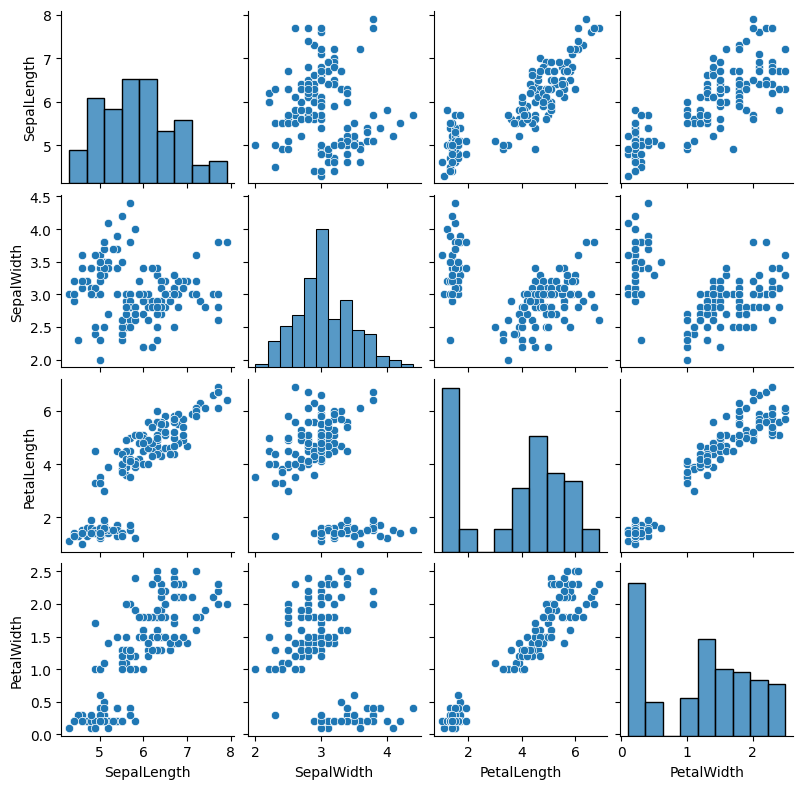

In [69]:
import seaborn as sns # 분석용 시각화
sns.pairplot(iris.iloc[:,:4],height=2) # 상관관계 시각화

<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

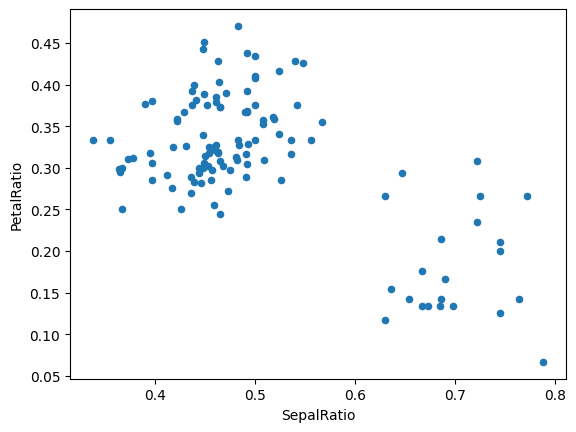

In [70]:
# chaining
(iris.query('SepalLength>5')
.assign(SepalRatio=lambda x:x.SepalWidth/x.SepalLength,
        PetalRatio=lambda x:x.PetalWidth/x.PetalLength)
.plot(kind='scatter',x='SepalRatio',y='PetalRatio'))

In [85]:
# 문제 :
 #- 'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나', '육하나','칠하나', '팔하나']
 #- 'Age':pd.Series([25,26,25,23,30,29,23])
 #- 'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])    

# 위 3가지 시리즈로 데이터 프레임을 생성하시오
# 데이터 타입을 확인하시오
# 차원을 확인하고 차수를 확인하시오
# 전체 데이터 사이즈를 확인하시오
# 값들만 출력하시오
Name = pd.Series(['김하나','이하나','삼하나','사하나','오하나', '육하나','칠하나', '팔하나'])
Age = pd.Series([25,26,25,23,30,29,23])
Rating = pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])

test=pd.DataFrame({'Name':Name,'Age':Age,'Rating':Rating})
print(test)

type(test)
print("차원: ",test.ndim)
print("차수: ",test.shape)
print("전체데이터사이즈: ",test.size)
print("값만: ",test.values)

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
차원:  2
차수:  (8, 3)
전체데이터사이즈:  24
값만:  [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]


In [94]:
# 수업내용
d= {'Name' : pd.Series(['김하나','이하나','삼하나','사하나','오하나', '육하나','칠하나']),
'Age' : pd.Series([25,26,25,23,30,29,23]),
'Rating' : pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

df= pd.DataFrame(d)
print("데이터 타입",df.dtypes)
print("차원",df.ndim)
print("차수",df.shape)
print("사이즈",df.size)
print("값",df.values)

print("축",df.axes)
print("행인덱스",df.index)
print("열인덱스",df.columns)

print("\n")
print("비었는지?",df.empty)
print(df.head(3))
print(df.tail(2))

데이터 타입 Name       object
Age         int64
Rating    float64
dtype: object
차원 2
차수 (7, 3)
사이즈 21
값 [['김하나' 25 4.23]
 ['이하나' 26 3.24]
 ['삼하나' 25 3.98]
 ['사하나' 23 2.56]
 ['오하나' 30 3.2]
 ['육하나' 29 4.6]
 ['칠하나' 23 3.8]]
축 [RangeIndex(start=0, stop=7, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
행인덱스 RangeIndex(start=0, stop=7, step=1)
열인덱스 Index(['Name', 'Age', 'Rating'], dtype='object')


비었는지? False
  Name  Age  Rating
0  김하나   25    4.23
1  이하나   26    3.24
2  삼하나   25    3.98
  Name  Age  Rating
5  육하나   29     4.6
6  칠하나   23     3.8


In [96]:
# 문제
# 열별합계 계산
print("합계",df.sum(axis=0,numeric_only=True))
print("상관계수",df.corr())
print("평균",df.mean(axis=0))
print("표준편차",df.std(axis=0))

합계 Age       181.00
Rating     25.61
dtype: float64
상관계수              Age    Rating
Age     1.000000  0.259006
Rating  0.259006  1.000000
평균 Age       25.857143
Rating     3.658571
dtype: float64
표준편차 Age       2.734262
Rating    0.698628
dtype: float64


<ipython-input-96-df7273c2cab4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("상관계수",df.corr())
<ipython-input-96-df7273c2cab4>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("평균",df.mean(axis=0))
<ipython-input-96-df7273c2cab4>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("표준편차",df.std(axis=0))


In [97]:
print(df.describe())

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


In [101]:
print('오브젝트',df.describe(include=['object']))

print("구분")

print(df.describe(include='all'))

오브젝트        Name
count     7
unique    7
top     김하나
freq      1
구분
       Name        Age    Rating
count     7   7.000000  7.000000
unique    7        NaN       NaN
top     김하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [119]:
data={'state': ['경기', '강원', '서울', '충북', '인천'],
      'year':[2000,2001,2002,2001,2002],
      'pop':[1.5,1.7,3.6,2.4,2.9]}

# 1)위의 데이터로 데이터 프레임을 생성하시오
# (인덱스는 'one','two','three','four','five')
dataf=pd.DataFrame(data,index=['one','two','three','four','five'])
print(dataf)
# 2)state만 출력
dataf.loc[:,'state']
dataf.state
print(dataf['state'])
# 3)debt열을 추가 모든 값을 16.5로
dataf['debt']=[16.5,16.5,16.5,16.5,16.5]
print(dataf)
# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울이면 True 아니면 False
dataf['estern']=dataf.state=='서울'
print(dataf)
# 5) debt열에 대하여 (-1.2,-1.5,-1.7) index=['two','four','five]로 된 시리즈를 만들고 대체하시오
dataf.loc[['two', 'four', 'five'], 'debt'] = [-1.2, -1.5, -1.7]
print(dataf)

val=pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
dataf['debt']=val

# 6) 합계를 출력하시오( 의미있는 열에 대해서 합계)
print("합계",dataf.sum(axis=0,numeric_only=True))
# 7) 모든 행의 데이터를 설명해보시오(describe)
print(dataf.describe(include='all'))

dataf.state.value_counts()
dataf.state.sort_index()# 인덱스 기준으로 정렬
dataf.sort_values(['year']) #값으로 정렬

      state  year  pop
one      경기  2000  1.5
two      강원  2001  1.7
three    서울  2002  3.6
four     충북  2001  2.4
five     인천  2002  2.9
one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object
      state  year  pop  debt
one      경기  2000  1.5  16.5
two      강원  2001  1.7  16.5
three    서울  2002  3.6  16.5
four     충북  2001  2.4  16.5
five     인천  2002  2.9  16.5
      state  year  pop  debt  estern
one      경기  2000  1.5  16.5   False
two      강원  2001  1.7  16.5   False
three    서울  2002  3.6  16.5    True
four     충북  2001  2.4  16.5   False
five     인천  2002  2.9  16.5   False
      state  year  pop  debt  estern
one      경기  2000  1.5  16.5   False
two      강원  2001  1.7  -1.2   False
three    서울  2002  3.6  16.5    True
four     충북  2001  2.4  -1.5   False
five     인천  2002  2.9  -1.7   False
합계 year      10006.0
pop          12.1
debt         -4.4
estern        1.0
dtype: float64
       state        year       pop      debt estern
count      5   

,state,year,pop,debt,estern
one,경기,2000,1.5,NaN,False
two,강원,2001,1.7,-1.2,False
four,충북,2001,2.4,-1.5,False
three,서울,2002,3.6,NaN,True
five,인천,2002,2.9,-1.7,False


In [122]:
df =pd.DataFrame({"y":[1,2,3]},index=pd.to_datetime(["2000-03-31 00:00:00",
                                                     "2000-05-31 00:00:00",
                                                     "2000-08-31 00:00:00"]))
print(df)
print(df.axes) # Datetimeindex 인덱스(행과 열을 구분하는 객체) 발달
df.index=df.index.to_period("M") # 기간 (Month)
df

            y
2000-03-31  1
2000-05-31  2
2000-08-31  3
[DatetimeIndex(['2000-03-31', '2000-05-31', '2000-08-31'], dtype='datetime64[ns]', freq=None), Index(['y'], dtype='object')]


,y
2000-03,1
2000-05,2
2000-08,3


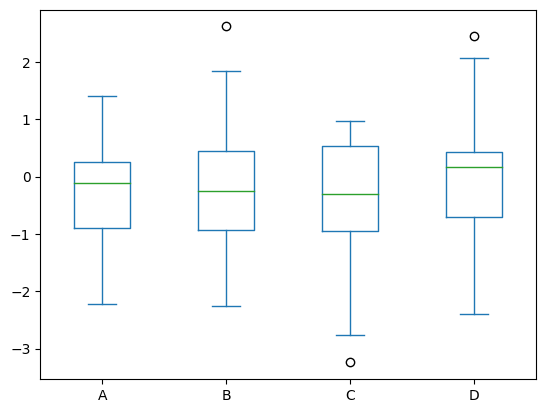

In [123]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=np.random.randn(25,4)
df=pd.DataFrame(data,columns=list('ABCD'))
ax=df.plot.box()
plt.show()

In [124]:
original_df=pd.DataFrame({"일반":range(5),"특수":range(5,10)})
original_df.to_pickle("./dummy.pkl") # 메모리의 내용을 그대로 저장
unpickled_df = pd.read_pickle("./dummy.pkl")
unpickled_df

,일반,특수
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [127]:
data = {'name': ['하늘이', '찬호박', '우리야', '함께가', '하성공'],
'age': [40, 50, 30, 20, 70],
'preScore': [14, 28, 39, 25, 32],
'postScore': [20, 90, 55, 65, 79]}
df = pd.DataFrame(data,columns = ['name', 'age', 'preScore', 'postScore'])

print(df)

  name  age  preScore  postScore
0  하늘이   40        14         20
1  찬호박   50        28         90
2  우리야   30        39         55
3  함께가   20        25         65
4  하성공   70        32         79


In [129]:
print(df['age'].sum())
print(df['preScore'].mean())
print(df['preScore'].describe())
print(df['preScore'].var())
print(df['preScore'].std())
print(df['preScore'].skew()) # 왜도
print(df['preScore'].kurt()) # 첨도

print(df.corr())
print(df.cov()) # 공분산
print(np.cov(df[['age','preScore','postScore']].T))
print(np.corrcoef(df[['age','preScore','postScore']].T))

210
27.6
count     5.0000
mean     27.6000
std       9.2358
min      14.0000
25%      25.0000
50%      28.0000
75%      32.0000
max      39.0000
Name: preScore, dtype: float64
85.30000000000001
9.235799911215056
-0.5110345040062979
0.8509652849263816
                age  preScore  postScore
age        1.000000  0.104135   0.387467
preScore   0.104135  1.000000   0.573134
postScore  0.387467  0.573134   1.000000
             age  preScore  postScore
age        370.0      18.5      200.5
preScore    18.5      85.3      142.4
postScore  200.5     142.4      723.7
[[370.   18.5 200.5]
 [ 18.5  85.3 142.4]
 [200.5 142.4 723.7]]
[[1.         0.10413491 0.38746656]
 [0.10413491 1.         0.57313402]
 [0.38746656 0.57313402 1.        ]]


<ipython-input-129-c4caf35d4f59>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-129-c4caf35d4f59>:10: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov()) # 공분산


In [139]:
#        지역	   2018	   2017	   2016	   2015	2015-2018 증가율
# 서울 수도권 9904312 9631482 9762546 9853972 0.0283
# 부산 경상권 3448737 3393191 3512547 3655437 0.0163
# 인천 수도권 2890451 2632035 2517680 2466338 0.0982
# 대구 경상권 2466052 2431774 2456016 2473990 0.0141

# 위 데이터를 데이터 프레임으로 입력하시오


data = {'지역': ['수도권', '경상권', '수도권', '경상권'],
'2018': [0.9904312, 3448737, 2890451, 2466052],
'2017': [9631482, 3393191, 2632035, 2431774],
'2016': [9762546, 3512547, 2517680, 2456016],
'2015': [9853972, 3655437, 2466338, 2473990],
'2015-2018증가율': [0.0283,0.0163,0.0982,0.0141]}

dataf=pd.DataFrame(data,index=['서울','부산','인천','대구'])
print(dataf)

# 문제: 2015-2018 증가율을 %로 변경
dataf['2015-2018증가율']=dataf['2015-2018증가율']*100
print(dataf)
# 문제: 2015-2017 증가율을 구해서 변수로 추가
print((dataf['2018']-dataf['2015'])/dataf['2018'])
dataf['2015-2017증가율']=(dataf['2017']-dataf['2015'])/dataf['2015']
print(dataf)

     지역     2018     2017     2016     2015  2015-2018증가율
서울  수도권  9904312  9631482  9762546  9853972        0.0283
부산  경상권  3448737  3393191  3512547  3655437        0.0163
인천  수도권  2890451  2632035  2517680  2466338        0.0982
대구  경상권  2466052  2431774  2456016  2473990        0.0141
     지역     2018     2017     2016     2015  2015-2018증가율
서울  수도권  9904312  9631482  9762546  9853972          2.83
부산  경상권  3448737  3393191  3512547  3655437          1.63
인천  수도권  2890451  2632035  2517680  2466338          9.82
대구  경상권  2466052  2431774  2456016  2473990          1.41
서울    0.005083
부산   -0.059935
인천    0.146729
대구   -0.003219
dtype: float64
     지역     2018     2017     2016     2015  2015-2018증가율  2015-2017증가율
서울  수도권  9904312  9631482  9762546  9853972          2.83     -0.022579
부산  경상권  3448737  3393191  3512547  3655437          1.63     -0.071741
인천  수도권  2890451  2632035  2517680  2466338          9.82      0.067183
대구  경상권  2466052  2431774  2456016  2473990          1.41

In [141]:
# 계층적인덱스
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [142]:
pop[('California',2010):('Texas',2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [146]:
# 2010년도 데이터만 출력
pop.index
pop[[i for i in pop.index if i[1]== 2010]]


<generator object <genexpr> at 0x7f2c74f355b0>


In [148]:
# 계층적 인덱스
index=pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [149]:
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [150]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [151]:
pop_df=pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [152]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [153]:
# 멀티 인덱스를 가진 시리즈가 데이터프레임으로 들어올 때

pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [154]:
Sample={'Value':[5.52132,6.572935,7.21,8.755,9.9989]}
df=pd.DataFrame(Sample,columns=['Value'])

print(df)
df['Value'].round(decimals=3)
roundThree=np.round(df['Value'],decimals=3)
print(roundThree)
print('올림',df['Value'].apply(np.ceil))
df['Value'].apply(np.floor)

      Value
0  5.521320
1  6.572935
2  7.210000
3  8.755000
4  9.998900
0    5.521
1    6.573
2    7.210
3    8.755
4    9.999
Name: Value, dtype: float64
올림 0     6.0
1     7.0
2     8.0
3     9.0
4    10.0
Name: Value, dtype: float64


0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
Name: Value, dtype: float64

In [165]:
frame=pd.DataFrame((np.random.randn(4,3)),columns=list(['rain','income','tax']),index=['seoul','daejeon','incheon','daegu'])
print(frame)
print("absoulute함수 적용",np.abs(frame))
# 열방향과 행방향으로 range값을 구하고 싶을 때 함수를 작성해서 구하시오
frame.columns

             rain    income       tax
seoul    0.285572 -0.962784  1.684429
daejeon -0.408505  0.950972 -1.293834
incheon  1.207383 -1.849685  1.232479
daegu    0.595480  0.180038  1.076554
absoulute함수 적용              rain    income       tax
seoul    0.285572  0.962784  1.684429
daejeon  0.408505  0.950972  1.293834
incheon  1.207383  1.849685  1.232479
daegu    0.595480  0.180038  1.076554


Index(['rain', 'income', 'tax'], dtype='object')

In [173]:
print(frame.apply(np.ptp,axis=0))
print(frame.apply(np.ptp,axis=1))

f=lambda x: x.max()-x.min()
print("함수 객체의 행 적용(열방향)",frame.apply(f,axis=0))
print("함수 객체의 열 적용(행방향)",frame.apply(f,axis=1))

def f(x):
  return pd.Series([x.min(),x.max()],index=['min','max'])
print("함수 객체 전용",frame.apply(f)) # 열별로 확인

format=lambda x: '%.2f' %x
print(frame.applymap(format))

print(frame['rain'].map(format))

rain      1.615888
income    2.800658
tax       2.978263
dtype: float64
seoul      2.647213
daejeon    2.244806
incheon    3.082165
daegu      0.896516
dtype: float64
함수 객체의 행 적용(열방향) rain      1.615888
income    2.800658
tax       2.978263
dtype: float64
함수 객체의 열 적용(행방향) seoul      2.647213
daejeon    2.244806
incheon    3.082165
daegu      0.896516
dtype: float64
함수 객체 전용          rain    income       tax
min -0.408505 -1.849685 -1.293834
max  1.207383  0.950972  1.684429
          rain income    tax
seoul     0.29  -0.96   1.68
daejeon  -0.41   0.95  -1.29
incheon   1.21  -1.85   1.23
daegu     0.60   0.18   1.08
seoul       0.29
daejeon    -0.41
incheon     1.21
daegu       0.60
Name: rain, dtype: object


In [223]:
import pandas as pd
import statistics
import numpy as np
# 이름 국어 영어 수학 점수를 3인분을 입력받아서
data={'국어':[100,95,90],'영어':[100,60,80],'수학':[100,80,90]}
name=['안녕','커피','우유']
# 데이터 프레임으로 변환하고
dataf=pd.DataFrame(data,index=name)
# 합계와 평균을 구하시오( 과목별, 학생별 apply를 적용하시오)
print("열별 합계\n",dataf.apply(sum))
print("행별 합계\n",dataf.apply(sum,axis=1))
print("열별 평균\n",dataf.apply(statistics.mean))
print("행별 평균\n",dataf.apply(statistics.mean,axis=1))
# 데이터프레임을 합계를 기준으로 정렬하고 등수를 입력하시오
row_sum=dataf.apply(sum,axis=1)
dataf_sorted = dataf.loc[row_sum.sort_values(ascending=True).index]
dataf_sorted['등수']=range(1,len(dataf_sorted)+1)
print(dataf_sorted)

# 과목별 분산과 표준편차를 구하시오(apply를 적용)
print(dataf.apply(np.var))
print(dataf.apply(np.std))
# 과목별 상관계수와 공분산을 구하시오
print(dataf.corr())
print(dataf.cov())

열별 합계
 국어    285
영어    240
수학    270
dtype: int64
행별 합계
 안녕    300
커피    235
우유    260
dtype: int64
열별 평균
 국어    95
영어    80
수학    90
dtype: int64
행별 평균
 안녕    100.000000
커피     78.333333
우유     86.666667
dtype: float64
     국어   영어   수학  등수
커피   95   60   80   1
우유   90   80   90   2
안녕  100  100  100   3
국어     16.666667
영어    266.666667
수학     66.666667
dtype: float64
국어     4.082483
영어    16.329932
수학     8.164966
dtype: float64
     국어   영어   수학
국어  1.0  0.5  0.5
영어  0.5  1.0  1.0
수학  0.5  1.0  1.0
      국어     영어     수학
국어  25.0   50.0   25.0
영어  50.0  400.0  200.0
수학  25.0  200.0  100.0


In [288]:
import pandas as pd
import numpy as np
# pymysql을 이용해서 DB에 있는 성적 데이터를 가지고 온 다음 데이터프레임을 만들고
# 과목별 평균과 표준편차를 구하시오
import pymysql

# MySQL Connection 연결
conn = pymysql.connect(host='34.64.69.204', user='root', password='acorn1234', db='sungjuk', charset='utf8',port=3306)

# Connection으로부터 Cursor 생성
curs = conn.cursor()

# SQL문 실행
sql = "SELECT * FROM student"
curs.execute(sql)

# 데이타 Fetch
rows = curs.fetchall()

# 데이타 프레임으로 변환
df = pd.DataFrame(rows)

# 컬럼명 추가
df.columns = ['bunho', 'name', 'kor', 'mat', 'eng','total','average','grade','schoolcode']

# DB 연결 종료
conn.close()
score = df.loc[:, ['kor', 'mat', 'eng']]
score.kor=score.kor.astype(int)
score.mat=score.mat.astype(int)
score.eng=score.eng.astype(int)

score.apply(np.mean)
score.apply(np.std)

kor     7.945804
mat     8.646701
eng    10.842304
dtype: float64

In [212]:
len(dataf_sorted)

3

# 주말과제

# arrow를 기반으로 동작하는 pandas2.0에 대하여
- 설치법
- 사용할 때의 효과
- 오늘의 예제 중에 하나를 pandas2.0으로 구현하시오

# pandas에서 지원하는 데이터 요약 기능에 대하여 알아보고 정리한 리포트를 제출하시오
